
# 1.IMPORT LIBRARIES

In [1]:
#!pip install lazypredict
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import shap
from sklearn.model_selection import GridSearchCV

# 2.IMPORT DATA

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Accusaga_assignment/DS_dataset.csv')
data.head()

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0


# 3.DATA VISUALIZATION

In [3]:
data.isnull().sum()

Customer_ID              0
Var1                     0
Var2                     0
Group                    0
Category                 0
Rating                   0
Purchased_ABC_product    0
dtype: int64

In [4]:
data.describe()

,Customer_ID,Var1,Var2,Purchased_ABC_product
count,3.082900e+04,30829.000000,30829.000000,30829.000000
mean,3.057482e+06,64.868318,4.994489,0.503552
std,2.210470e+06,114.373345,9.533546,0.499995
min,6.470000e+02,0.251000,0.000000,0.000000
25%,1.501804e+06,13.256000,0.668000,0.000000
50%,2.192582e+06,31.860000,2.189000,1.000000
75%,4.732076e+06,68.702000,5.482000,1.000000
max,7.285914e+06,2909.776000,317.380000,1.000000


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


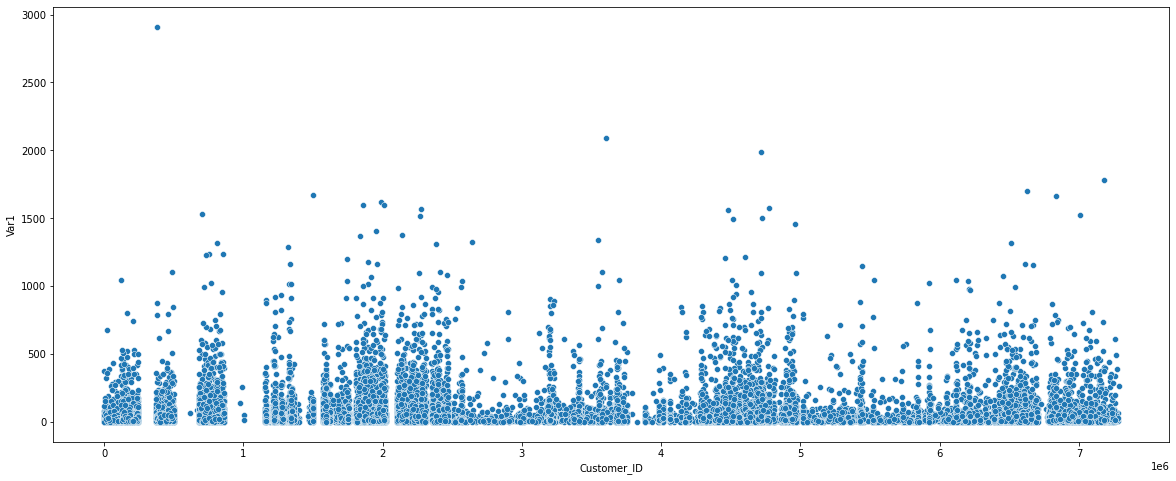

In [5]:
plt.figure(figsize = (20,8))
sns.scatterplot('Customer_ID','Var1',data = data)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


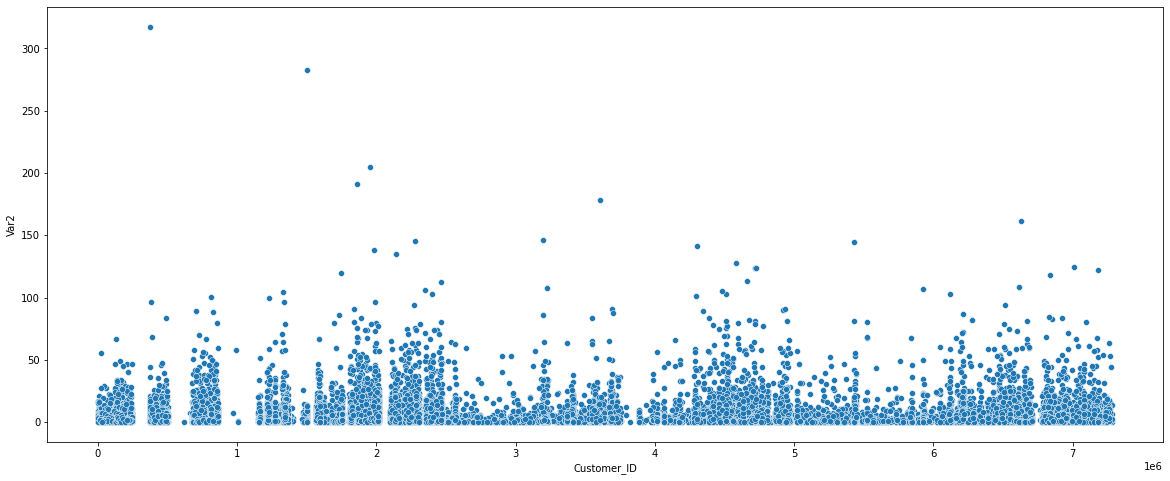

In [6]:
plt.figure(figsize = (20,8))
sns.scatterplot('Customer_ID','Var2',data = data)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


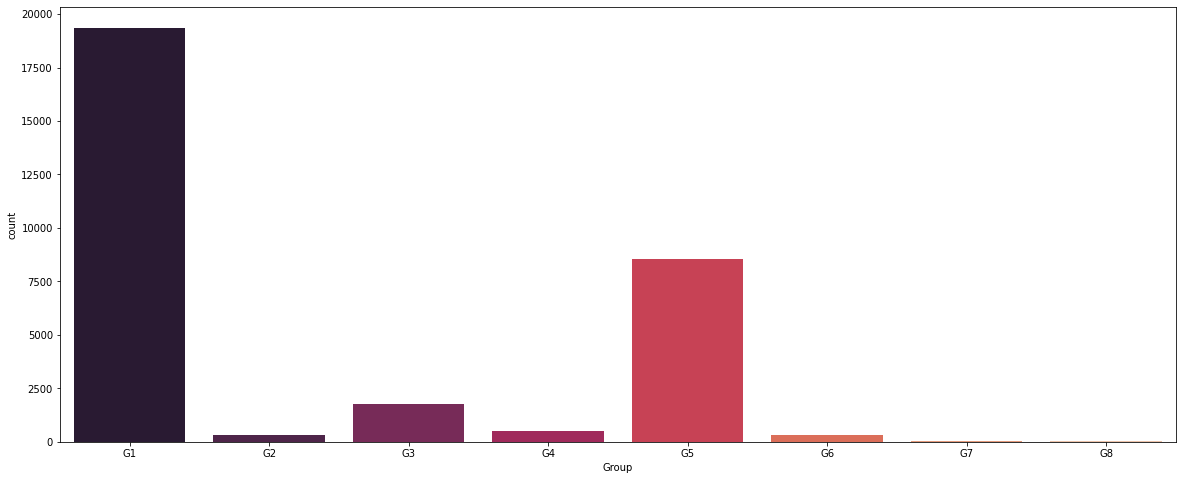

In [7]:
plt.figure(figsize = (20,8))
sns.countplot('Group',data = data, palette = 'rocket')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


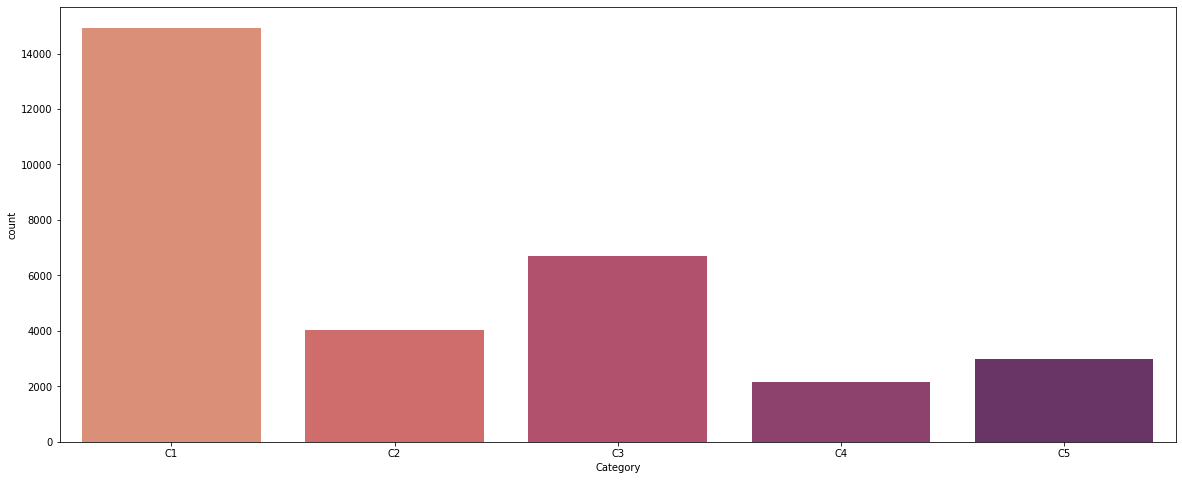

In [8]:
plt.figure(figsize = (20,8))
sns.countplot('Category',data = data, palette = 'flare')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


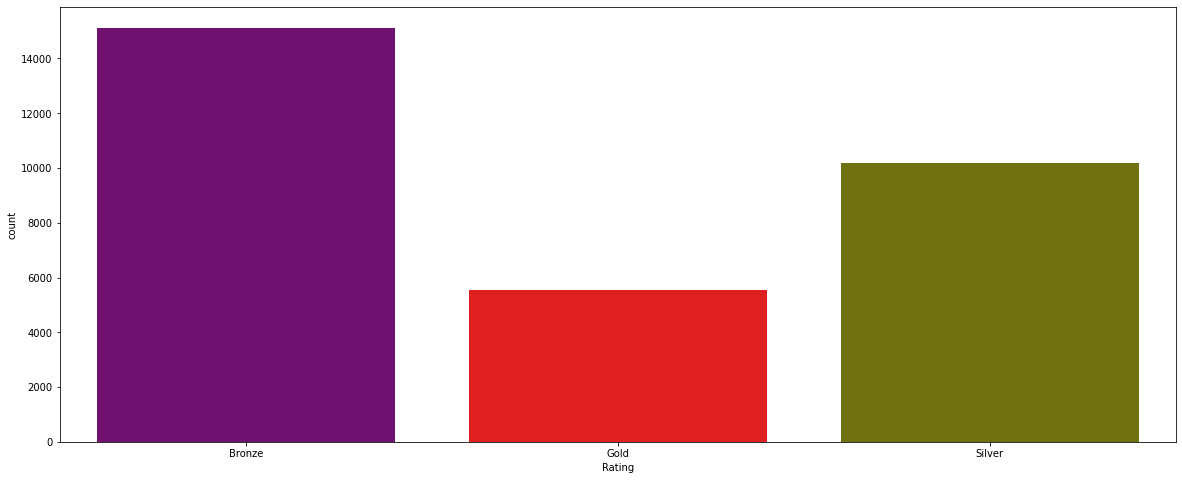

In [9]:
plt.figure(figsize = (20,8))
sns.countplot('Rating',data = data, palette = 'brg')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


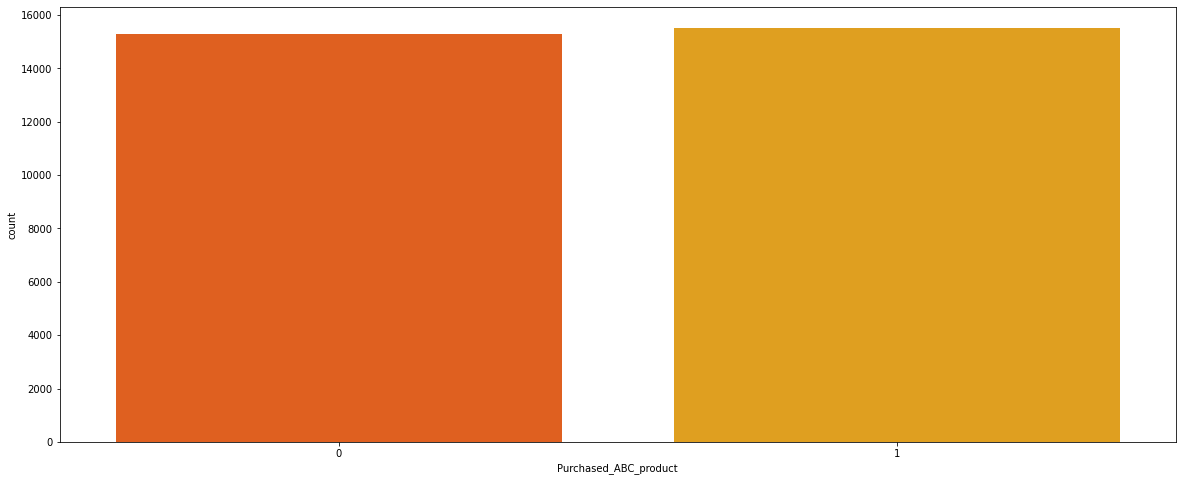

In [10]:
plt.figure(figsize = (20,8))
sns.countplot('Purchased_ABC_product',data = data,palette = 'autumn')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


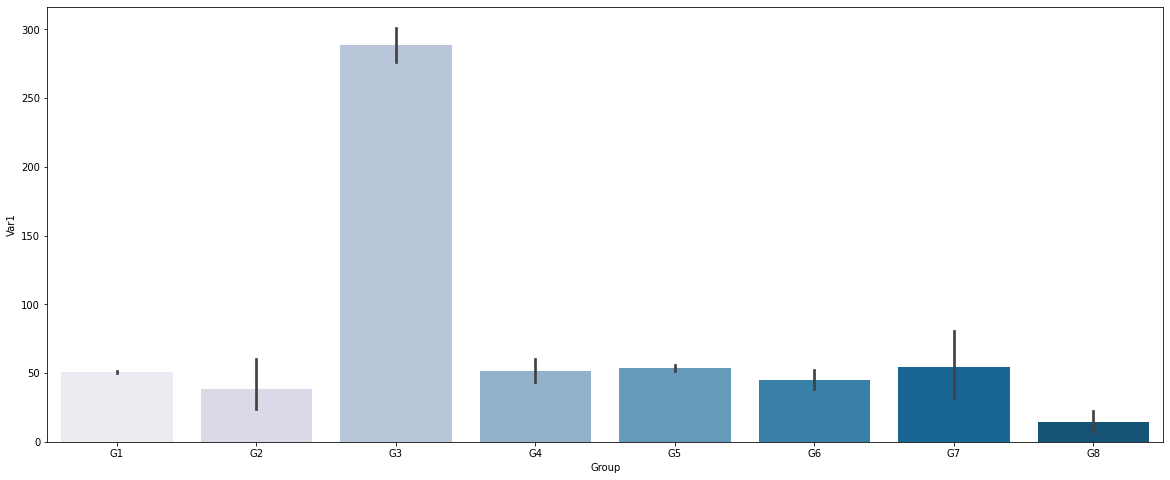

In [11]:
plt.figure(figsize = (20,8))
sns.barplot('Group','Var1',data = data, palette = 'PuBu')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


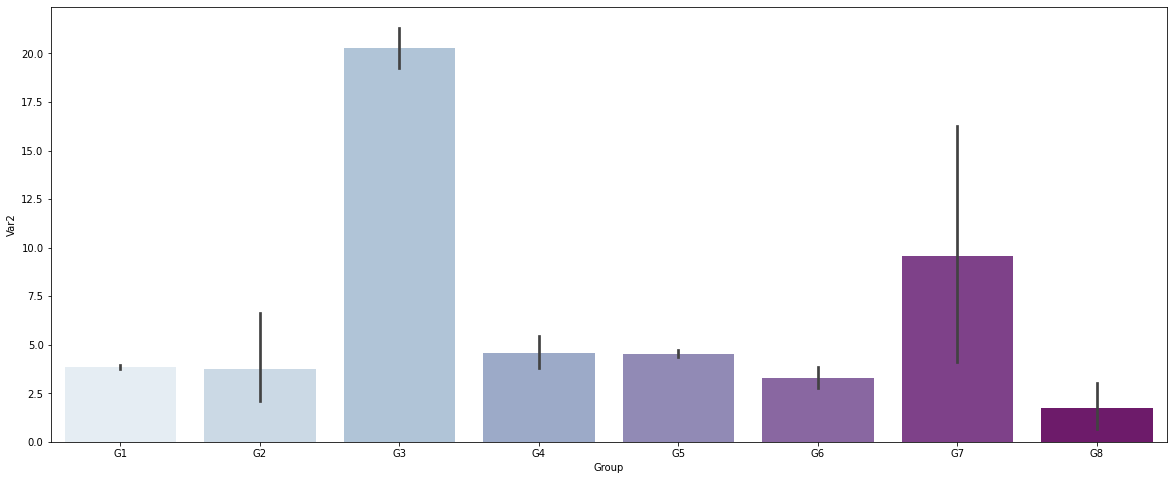

In [12]:
plt.figure(figsize = (20,8))
sns.barplot('Group','Var2',data = data, palette = 'BuPu')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


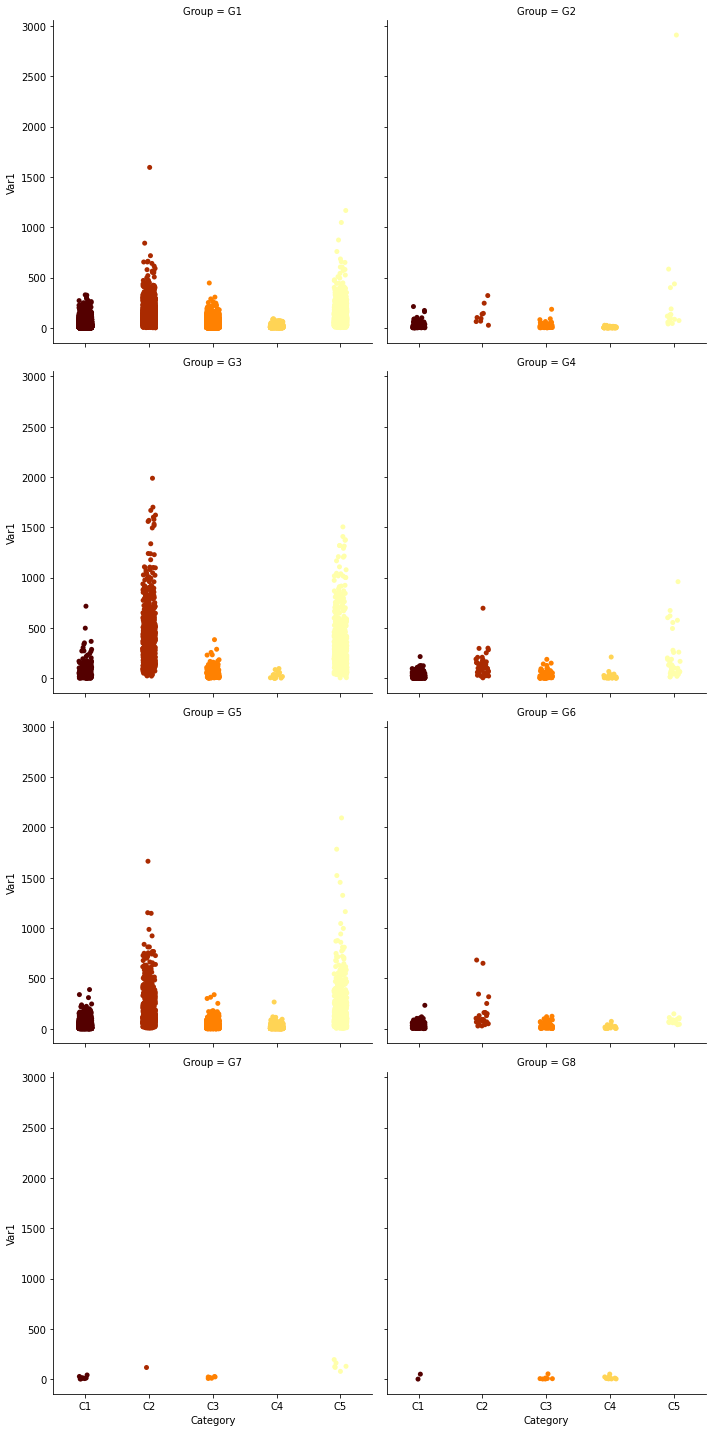

In [13]:
sns.catplot('Category','Var1',data = data,col = 'Group',col_wrap = 2,palette = 'afmhot')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


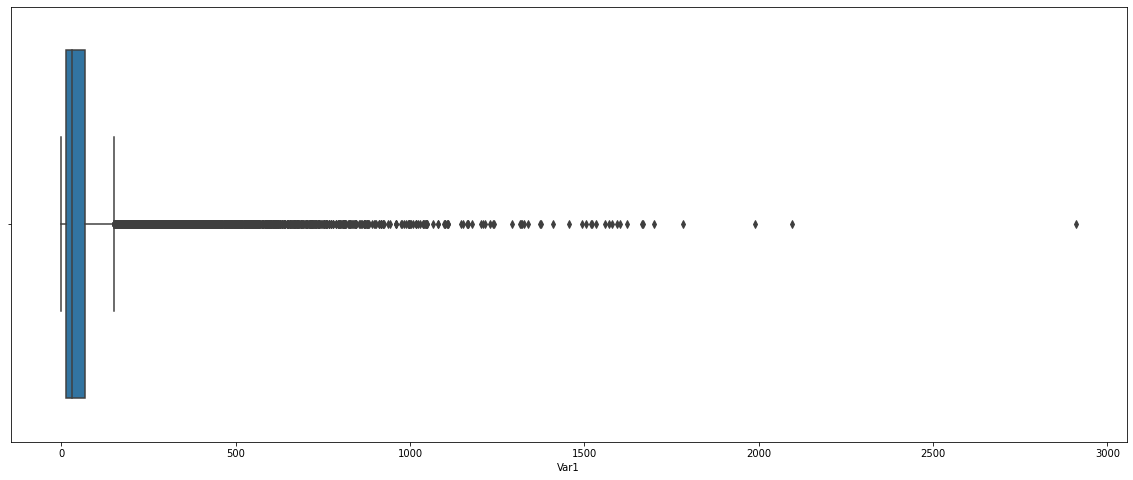

In [14]:
plt.figure(figsize = (20,8))
sns.boxplot('Var1',data = data)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


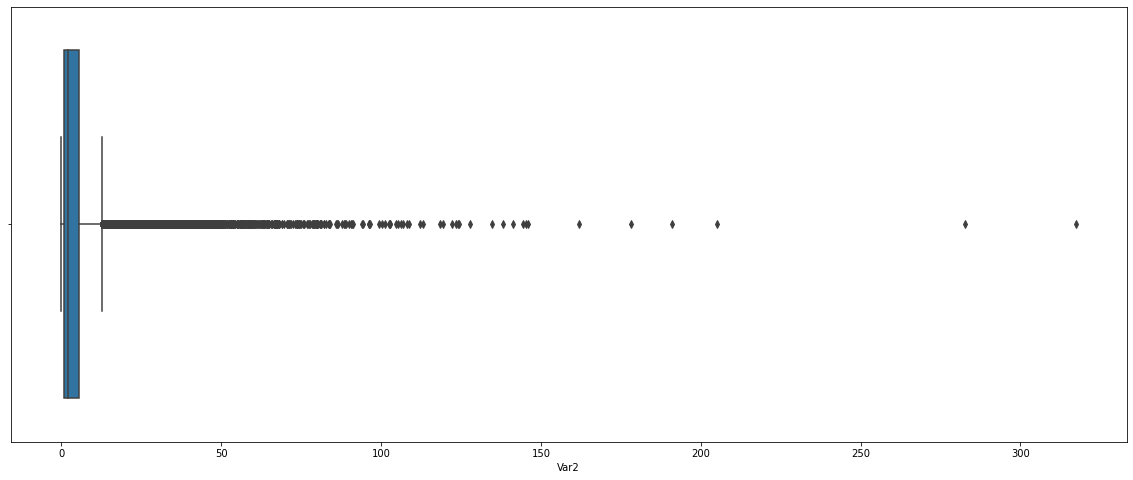

In [15]:
plt.figure(figsize = (20,8))
sns.boxplot('Var2',data = data)

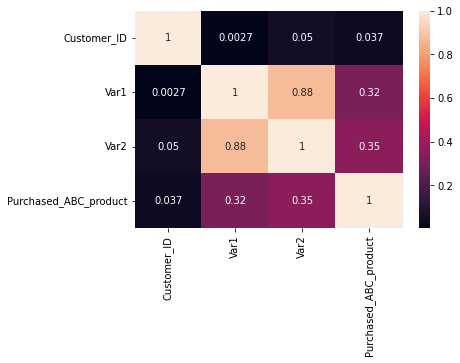

In [16]:
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'rocket')

- From above correlation plot you can see that Var2 is affecting on dependent variable more as compare to other variables.

# 4.DATA PREPROCESSING

In [17]:
Q1 = data['Var1'].quantile(0.25)
Q3 = data['Var1'].quantile(0.75)
IQR = Q3 - Q1

filter = (data['Var1'] >= Q1 - 1.5 * IQR) & (data['Var1']<= Q3 + 1.5 *IQR)
train1 = data.loc[filter]  
print("data loss percentage {}%".format(((len(data) - len(train1))/len(data))*100))

data loss percentage 8.865029679846897%


In [18]:
Q1 = train1['Var2'].quantile(0.25)
Q3 = train1['Var2'].quantile(0.75)
IQR = Q3 - Q1

filter = (train1['Var2'] >= Q1 - 1.5 * IQR) & (train1['Var2']<= Q3 + 1.5 *IQR)
train2 = train1.loc[filter] 
print("data loss percentage {}%".format(((len(train1) - len(train2))/len(train1))*100))

data loss percentage 5.3423974943052395%


In [19]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train2['Group'] = label.fit_transform(train2['Group'])
train2['Category'] = label.fit_transform(train2['Category'])
train2['Rating'] = label.fit_transform(train2['Rating'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
x = train2.iloc[:,1:-1]

y = train2.iloc[:,-1]


# 5.VALIDATION METHOD

In [21]:
from sklearn.model_selection import train_test_split

#Split data into Train and test format
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =35)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('shape of Test:{}'.format(x_test.shape))

Shape of Training Xs:(19946, 5)
shape of Test:(6649, 5)


In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_train

array([[ 3.21812366,  0.0036305 , -0.70332793, -0.02388686,  1.30382258],
       [ 1.06959127,  0.10081928, -0.70332793, -0.80880829,  1.30382258],
       [-0.25515975,  0.96264282,  1.45824046, -0.80880829, -0.84659253],
       ...,
       [-0.66557039, -0.3805559 , -0.70332793, -0.80880829, -0.84659253],
       [-0.84541984, -0.60068432, -0.70332793, -0.80880829, -0.84659253],
       [-0.51659039, -0.86400776, -0.70332793, -0.80880829, -0.84659253]])

In [23]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
test = std.fit_transform(x_test)
test

array([[-0.92683293, -0.99936732, -0.71644566, -0.8090292 ,  1.31042069],
       [ 0.45457785,  1.38625582,  0.89507233, -0.8090292 , -0.83907658],
       [-0.99198828, -0.99936732, -0.71644566,  0.75629457, -0.83907658],
       ...,
       [-0.44825672, -0.92696287, -0.71644566,  0.75629457, -0.83907658],
       [-0.83896106, -0.55625209,  1.43224499,  1.53895645, -0.83907658],
       [ 0.47618782, -0.1218254 , -0.71644566,  2.32161834,  0.23567206]])

# 6.MODEL BUILDING

In [24]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, test, y_train, y_test)

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
100%|██████████| 29/29 [03:06<00:00,  6.44s/it]


In [25]:
print(models)

                               Accuracy  ...  Time Taken
Model                                    ...            
AdaBoostClassifier                 0.75  ...        1.49
LGBMClassifier                     0.74  ...        0.28
SVC                                0.74  ...       15.39
XGBClassifier                      0.73  ...        1.17
SGDClassifier                      0.74  ...        0.12
LabelSpreading                     0.73  ...       31.98
LabelPropagation                   0.73  ...       30.46
CalibratedClassifierCV             0.73  ...        5.13
LogisticRegression                 0.73  ...        0.12
RandomForestClassifier             0.71  ...        2.79
LinearSVC                          0.72  ...        0.65
NearestCentroid                    0.71  ...        0.08
LinearDiscriminantAnalysis         0.72  ...        0.13
RidgeClassifier                    0.72  ...        0.05
RidgeClassifierCV                  0.72  ...        0.06
KNeighborsClassifier           

# XGB Classifier

In [26]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

In [27]:
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(test)
score = xgb.score(test,y_test)

In [28]:
print(score)

0.7291322003308768


In [29]:
from sklearn.metrics import precision_score

print(precision_score(y_test,y_predicted))


from sklearn.metrics import recall_score

recall_score(y_test,y_predicted)

0.678617157490397


0.7267740829619472

# 7.PERFORMANCE MATRICES
## Confusion Matrix
- Following plot shows you that predicted true positve rate is 2771 and predictive true negative rate is 2201. 961 is the false positive that are wrongly predicted and also 716 is also false negative that are worngly predicted.
- Here we have to increase count of true positive and true negative and reduce count of false positive and false negative.

In [30]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[2728, 1004],
       [ 797, 2120]])

In [31]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [32]:
classes = train2["Purchased_ABC_product"].value_counts()
classes.index = [str(x) for x in classes.index]

Confusion matrix, without normalization
[[2728 1004]
 [ 797 2120]]
Normalized confusion matrix
[[0.73 0.27]
 [0.27 0.73]]


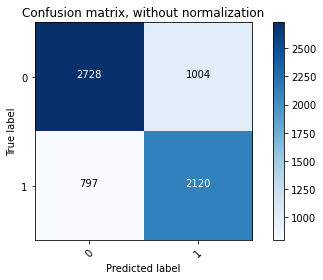

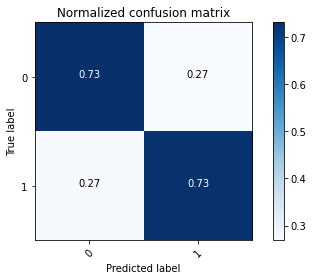

In [33]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes.index,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= classes.index, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# L GBM Classifier

In [34]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

lgb.fit(x_train,y_train)
y_predicted = lgb.predict(test)
score = lgb.score(test,y_test)

print(score)

0.7386073093698301


In [35]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[2757,  975],
       [ 763, 2154]])

In [36]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2757  975]
 [ 763 2154]]
Normalized confusion matrix
[[0.74 0.26]
 [0.26 0.74]]


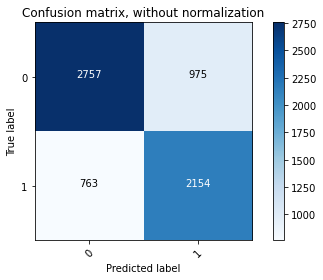

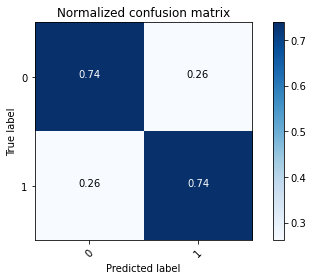

In [37]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes.index,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= classes.index, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [38]:
from sklearn.metrics import precision_score

precision_score(y_test,y_predicted)

0.6883988494726749

In [39]:
from sklearn.metrics import recall_score

recall_score(y_test,y_predicted)

0.7384298937264313

# 8.SHAP VALUE

- Interpretting train model using SHAP

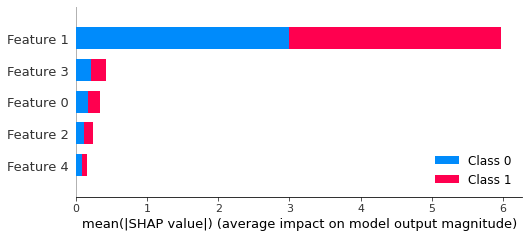

In [40]:
shap.initjs()

X_shap=x_train.copy()


lgb_explainer = shap.TreeExplainer(lgb)
lgb_shap_values = lgb_explainer.shap_values(X_shap)
shap.summary_plot(lgb_shap_values, X_shap, plot_type="bar")

Here we can see which variable is pushing towards 0 and 1.

# 9. HYPERPARAMETER TUNING

In [41]:
# Doing a grid search using the parmeter grid
parameters = { 'max_depth': [5,6,7,8],
                 'learning_rate' : [0.01,0.02,0.03],
                  'num_iterations'    : [100, 200, 400]
                 }
grid_ = GridSearchCV(estimator=LGBMClassifier(), param_grid = parameters, cv = 2, n_jobs=4, verbose = 10)
grid_.fit(x_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   23.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   26.7s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:   30.2s finished


GridSearchCV(cv=2, estimator=LGBMClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [5, 6, 7, 8],
                         'num_iterations': [100, 200, 400]},
             verbose=10)

In [42]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params for LGBM:\n",grid_.best_estimator_)
print("\n The best score across ALL searched params for LGBM:\n",grid_.best_score_)
print("\n The best parameters across ALL searched params for LGBM:\n",grid_.best_params_)

# Getting the best estimator
lgbm_optimized_model = grid_.best_estimator_
lgbm_optimized_model.fit(x_train, y_train)

 Results from Grid Search 

 The best estimator across ALL searched params for LGBM:
 LGBMClassifier(learning_rate=0.03, max_depth=5, num_iterations=200)

 The best score across ALL searched params for LGBM:
 0.7386443397172365

 The best parameters across ALL searched params for LGBM:
 {'learning_rate': 0.03, 'max_depth': 5, 'num_iterations': 200}


LGBMClassifier(learning_rate=0.03, max_depth=5, num_iterations=200)

# ADABoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(x_train,y_train)
score = clf.score(test,y_test)
y_predicted = clf.predict(test)

print(score)

0.7453752443976538


In [44]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[2764,  968],
       [ 725, 2192]])

In [45]:
from sklearn.metrics import precision_score

precision_score(y_test,y_predicted)

0.6936708860759494

In [46]:
from sklearn.metrics import recall_score

recall_score(y_test,y_predicted)

0.7514569763455605

In [47]:
print(y_predicted)

[0 1 0 ... 0 0 1]


In [48]:

x_test = pd.DataFrame(x_test)
x_test = x_test.reset_index()
index = x_test.iloc[:,0]
y_test = pd.DataFrame(y_test)

#test_data = pd.concat(x_test,y_test)
#test_data

In [49]:
y_predicted = pd.DataFrame(y_predicted)
y_predicted = y_predicted.reset_index()

In [50]:
index = index.reset_index()


In [60]:
y_predicted.rename(columns={'index':'no','0':'y'},inplace=True)
index.rename(columns={'level_0':'no'},inplace=True)


In [64]:
y_predicted = pd.merge(index,y_predicted, on = 'no')


,no,index,0
0,0,9264,0
1,1,7210,1
2,2,15158,0
3,3,10354,1
4,4,23964,1
...,...,...,...
6644,6644,28307,0
6645,6645,18313,1
6646,6646,6105,0
6647,6647,1397,0


In [68]:
# Group of customers to whom we reach out to  increase sales of product of ABC.
ones = y_predicted[(y_predicted[0] == 1)]
ones

,no,index,0
1,1,7210,1
3,3,10354,1
4,4,23964,1
10,10,22076,1
11,11,6987,1
...,...,...,...
6633,6633,8579,1
6635,6635,15092,1
6637,6637,16780,1
6645,6645,18313,1
